In [1]:
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
fig = plt.figure()
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')


<Figure size 432x288 with 0 Axes>

In [2]:
x_arr = np.loadtxt('x_arr_vts00.txt')                                      #all elements are in micron
y_arr = np.loadtxt('y_arr_vts00.txt')                                       #all elements are in micron
z_arr = np.loadtxt('z_arr_vts00.txt') 
w_arr = np.loadtxt('w_arr_vts00.txt')
t_arr = np.loadtxt('dt_arr_vts00.txt') 

In [3]:
dt_min=1e-8                                                                   #initial time step
dt_max=1e-2                                                                   #final time step in msd graph
msd_xarr=[]                                                                    #mean squared x
msd_yarr=[]                                                                    #mean squared y
msd_zarr=[]
msd_warr=[]
msd_rarr=[]                                                                    #r is the msd array
mean_t_arr=[]                                                                  #dtarray for msd plot

N = 40    
timelaglog= np.logspace( np.log10(dt_min), np.log10(dt_max), num=N ) 
counterarray=[]                                                                 #no of data averaging for particular dt


In [4]:
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')

for m in range(0,len(timelaglog)-1):
    print(m)
    r=0 
    x=0
    y=0 
    z=0
    w=0
    count=0                                                                  
    for i in range(len(t_arr)):
        for j in range(i+1,len(t_arr)):
            timelag = t_arr[j]-t_arr[i]                                       
            if timelag >= timelaglog[m]:
                if timelag <= timelaglog[m+1]:
                    x = x+((x_arr[j]-x_arr[i])**2)
                    y = y+((y_arr[j]-y_arr[i])**2)
                    z = z+((z_arr[j]-z_arr[i])**2)
                    w = w+((w_arr[j]-w_arr[i])**2)
                    count = count+1
                else:
                    break;
            else:
                break;  
                
    print('no. of  points in bin',count) 
    x=float(x/count)
    y=float(y/count)
    z=float(z/count)
    w=float(w/count)
    r=float(x+y+z) 
    
    msd_xarr.append(x)
    msd_yarr.append(y)                                                        
    msd_zarr.append(z)
    msd_warr.append(w)
    msd_rarr.append(r)
    mean_t_arr.append(np.sqrt(timelaglog[m]*timelaglog[m+1]))
    print( 'tau=', np.sqrt(timelaglog[m]*timelaglog[m+1]) )
    counterarray.append(count)

    
time2=datetime.now().strftime('%Y-%m-%d %H:%M:%S') # final time ending of the run time
print(time1)
print(time2) 



0
no. of  points in bin 1745
tau= 1.193776641714437e-08
1
no. of  points in bin 1800
tau= 1.7012542798525893e-08
2
no. of  points in bin 1707
tau= 2.4244620170823283e-08
3
no. of  points in bin 1774
tau= 3.455107294592218e-08
4
no. of  points in bin 1789
tau= 4.923882631706737e-08
5
no. of  points in bin 1786
tau= 7.01703828670383e-08
6
no. of  points in bin 1942
tau= 1e-07
7
no. of  points in bin 1837
tau= 1.4251026703029976e-07
8
no. of  points in bin 1929
tau= 2.030917620904737e-07
9
no. of  points in bin 1972
tau= 2.894266124716752e-07
10
no. of  points in bin 2002
tau= 4.1246263829013527e-07
11
no. of  points in bin 2041
tau= 5.878016072274918e-07
12
no. of  points in bin 2241
tau= 8.376776400682924e-07
13
no. of  points in bin 2225
tau= 1.193776641714437e-06
14
no. of  points in bin 2278
tau= 1.701254279852591e-06
15
no. of  points in bin 2368
tau= 2.4244620170823308e-06
16
no. of  points in bin 2429
tau= 3.4551072945922185e-06
17
no. of  points in bin 2462
tau= 4.923882631706737

In [5]:
'''np.savetxt('msd_x_iso.txt',msd_xarr)
np.savetxt('msd_y_iso.txt',msd_yarr)
np.savetxt('msd_r_iso.txt',msd_rarr)
np.savetxt('t_arr_formsd_iso.txt',mean_t_arr)
np.savetxt('counterarray.txt',counterarray)'''

"np.savetxt('msd_x_iso.txt',msd_xarr)\nnp.savetxt('msd_y_iso.txt',msd_yarr)\nnp.savetxt('msd_r_iso.txt',msd_rarr)\nnp.savetxt('t_arr_formsd_iso.txt',mean_t_arr)\nnp.savetxt('counterarray.txt',counterarray)"

In [5]:
msd_rarr = np.array(msd_rarr)
msd_xarr = np.array(msd_xarr)
msd_zarr = np.array(msd_zarr)
msd_warr = np.array(msd_warr)
msd_yarr = np.array(msd_yarr)

In [6]:
msd_warr

array([5.17663452e-27, 7.61089828e-27, 1.04651538e-26, 1.51205802e-26,
       2.25188814e-26, 3.07648904e-26, 4.49548863e-26, 6.27851546e-26,
       9.03123358e-26, 1.40039782e-25, 1.89051817e-25, 2.56543218e-25,
       3.73864087e-25, 5.08879692e-25, 7.48323422e-25, 1.02081544e-24,
       1.52227698e-24, 2.23093624e-24, 3.32866968e-24, 4.35157884e-24,
       5.92014789e-24, 8.60240353e-24, 1.15011974e-23, 1.75585045e-23,
       2.57597485e-23, 3.39472971e-23, 4.71866901e-23, 6.66642021e-23,
       8.96788195e-23, 1.09343793e-22, 1.34902452e-22, 1.72437384e-22,
       1.85189880e-22, 2.19565881e-22, 2.28650018e-22, 2.66993754e-22,
       3.03909234e-22, 2.81781772e-22, 3.11502403e-22])

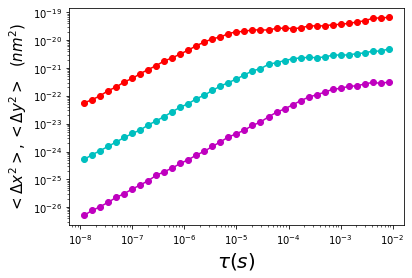

In [7]:
plt.plot(mean_t_arr,msd_yarr,'ro-')
plt.plot(mean_t_arr,msd_zarr,'co-')
plt.plot(mean_t_arr,msd_warr,'mo-')


plt.ylabel(r'$<\Delta x^2>,<\Delta y^2> \ \  (nm^2)$',size=15)
plt.xlabel(r'$\tau  (s)$',size=20)

'''plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,6))
plt.ticklabel_format(style='sci', axis='y', scilimits=(-8,6))'''

plt.xscale('log')
plt.yscale('log')
#plt.savefig('mvm_iso_x_y_long.png')

plt.show()


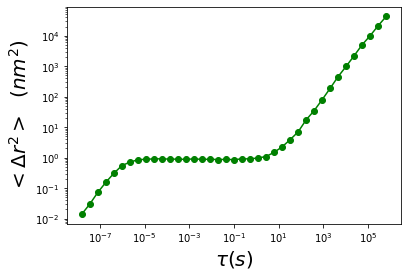

In [34]:

'''plt.plot(mean_t_arr,msd_rarr*1e18,'go-')

plt.ylabel(r'$<\Delta r^2> \ \  (nm^2)$',size=20)
plt.xlabel(r'$\tau  (s)$',size=20)

plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,6))
plt.ticklabel_format(style='sci', axis='y', scilimits=(-8,6))

plt.xscale('log')
plt.yscale('log')
plt.savefig('mvm_iso_long.png')

plt.show()

'''

In [11]:
import numpy
a = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])
index = ['time', 'msd_r', 'msd_x', 'msd_y']

import pandas as pd
df_a = pd.DataFrame(a, index)
df_a_tp = pd.DataFrame.transpose(df_a)

numpy.savetxt("mvm_vts_iso_2.csv", df_a_tp, delimiter=",")

In [8]:

alpha = 0
beta = -log(100)/5e1

In [9]:
time = 0

time1=5e1
time2=1e2
time3=15e1

In [10]:
mean_t_arr

[1.193776641714437e-08,
 1.7012542798525893e-08,
 2.4244620170823283e-08,
 3.455107294592218e-08,
 4.923882631706737e-08,
 7.01703828670383e-08,
 1e-07,
 1.4251026703029976e-07,
 2.030917620904737e-07,
 2.894266124716752e-07,
 4.1246263829013527e-07,
 5.878016072274918e-07,
 8.376776400682924e-07,
 1.193776641714437e-06,
 1.701254279852591e-06,
 2.4244620170823308e-06,
 3.4551072945922185e-06,
 4.923882631706737e-06,
 7.017038286703829e-06,
 9.999999999999999e-06,
 1.4251026703029978e-05,
 2.030917620904737e-05,
 2.8942661247167517e-05,
 4.124626382901352e-05,
 5.878016072274918e-05,
 8.376776400682924e-05,
 0.0001193776641714437,
 0.0001701254279852591,
 0.00024244620170823307,
 0.0003455107294592222,
 0.0004923882631706741,
 0.0007017038286703829,
 0.001000000000000001,
 0.0014251026703029992,
 0.0020309176209047366,
 0.0028942661247167516,
 0.004124626382901352,
 0.005878016072274918,
 0.008376776400682925]

In [11]:
n=len(mean_t_arr)

In [12]:
mean_t_arr1=mean_t_arr+(np.ones(n)*time1)
e_t=(np.exp(-(alpha-beta)*(mean_t_arr1)))
e_tw =(exp(-(alpha-beta)*time1))*np.ones(n)
ett_mean_t_arr1 = (1.0/(alpha - beta))*(e_tw - e_t)

In [13]:
ett_mean_t_arr1

array([1.19377657e-10, 1.70125484e-10, 2.42446183e-10, 3.45510715e-10,
       4.92388298e-10, 7.01703767e-10, 9.99999955e-10, 1.42510259e-09,
       2.03091759e-09, 2.89426607e-09, 4.12462628e-09, 5.87801586e-09,
       8.37677602e-09, 1.19377658e-08, 1.70125415e-08, 2.42446175e-08,
       3.45510675e-08, 4.92388151e-08, 7.01703601e-08, 9.99999540e-08,
       1.42510173e-07, 2.03091572e-07, 2.89426227e-07, 4.12461855e-07,
       5.87800016e-07, 8.37674409e-07, 1.19377008e-06, 1.70124095e-06,
       2.42443495e-06, 3.45505232e-06, 4.92377098e-06, 7.01681154e-06,
       9.99953950e-06, 1.42500915e-05, 2.03072769e-05, 2.89388039e-05,
       4.12384303e-05, 5.87642522e-05, 8.37354577e-05])

In [14]:
mean_t_arr2=mean_t_arr+(np.ones(n)*time2)
e_t=(np.exp(-(alpha-beta)*(mean_t_arr2)))
e_tw =(exp(-(alpha-beta)*time2))*np.ones(n)
ett_mean_t_arr2 = (1.0/(alpha - beta))*(e_tw - e_t)

In [15]:
ett_mean_t_arr2

array([1.19377755e-12, 1.70125296e-12, 2.42446192e-12, 3.45510809e-12,
       4.92388112e-12, 7.01703867e-12, 9.99999858e-12, 1.42510279e-11,
       2.03091760e-11, 2.89426608e-11, 4.12462637e-11, 5.87801587e-11,
       8.37677602e-11, 1.19377657e-10, 1.70125414e-10, 2.42446174e-10,
       3.45510673e-10, 4.92388150e-10, 7.01703601e-10, 9.99999539e-10,
       1.42510173e-09, 2.03091572e-09, 2.89426227e-09, 4.12461855e-09,
       5.87800016e-09, 8.37674409e-09, 1.19377008e-08, 1.70124095e-08,
       2.42443495e-08, 3.45505232e-08, 4.92377098e-08, 7.01681154e-08,
       9.99953950e-08, 1.42500915e-07, 2.03072769e-07, 2.89388039e-07,
       4.12384303e-07, 5.87642522e-07, 8.37354577e-07])

In [16]:
mean_t_arr3=mean_t_arr+(np.ones(n)*time3)
e_t=(np.exp(-(alpha-beta)*(mean_t_arr3)))
e_tw =(exp(-(alpha-beta)*time3))*np.ones(n)
ett_mean_t_arr3 = (1.0/(alpha - beta))*(e_tw - e_t)

In [17]:
ett_mean_t_arr3

array([1.19377755e-14, 1.70125499e-14, 2.42446197e-14, 3.45510824e-14,
       4.92388105e-14, 7.01703870e-14, 9.99999870e-14, 1.42510259e-13,
       2.03091760e-13, 2.89426608e-13, 4.12462637e-13, 5.87801567e-13,
       8.37677603e-13, 1.19377658e-12, 1.70125415e-12, 2.42446176e-12,
       3.45510675e-12, 4.92388152e-12, 7.01703601e-12, 9.99999539e-12,
       1.42510173e-11, 2.03091572e-11, 2.89426227e-11, 4.12461855e-11,
       5.87800016e-11, 8.37674409e-11, 1.19377008e-10, 1.70124095e-10,
       2.42443495e-10, 3.45505232e-10, 4.92377098e-10, 7.01681154e-10,
       9.99953950e-10, 1.42500915e-09, 2.03072769e-09, 2.89388039e-09,
       4.12384303e-09, 5.87642522e-09, 8.37354577e-09])

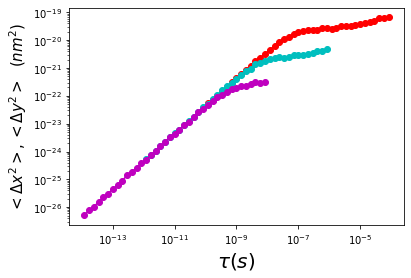

In [18]:
plt.plot(ett_mean_t_arr1,msd_yarr,'ro-')
plt.plot(ett_mean_t_arr2,msd_zarr,'co-')
plt.plot(ett_mean_t_arr3,msd_warr,'mo-')
#plt.plot(mean_t_arr,msd_zarr*1e18,'co-')


plt.ylabel(r'$<\Delta x^2>,<\Delta y^2> \ \  (nm^2)$',size=15)
plt.xlabel(r'$\tau  (s)$',size=20)


plt.xscale('log')
plt.yscale('log')
#plt.savefig('mvm_iso_x_y_long.png')

plt.show()



In [48]:
(msd_yarr[0])/(msd_zarr[7])

90.65162875592914

In [49]:
msd_zarr[7]

5.944441797381286e-26

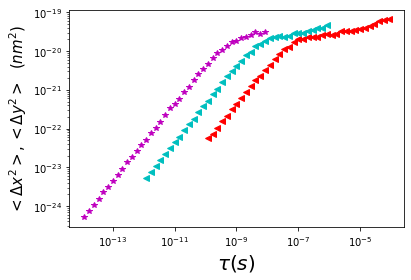

In [20]:
plt.plot(ett_mean_t_arr1,msd_yarr,'r<')
plt.plot(ett_mean_t_arr2,msd_zarr*10,'c<')
plt.plot(ett_mean_t_arr3,msd_warr*100,'m*')


plt.ylabel(r'$<\Delta x^2>,<\Delta y^2> \ \  (nm^2)$',size=15)
plt.xlabel(r'$\tau  (s)$',size=20)

'''plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,6))
plt.ticklabel_format(style='sci', axis='y', scilimits=(-8,6))'''

plt.xscale('log')
plt.yscale('log')
#plt.savefig('mvm_iso_x_y_long.png')

plt.show()




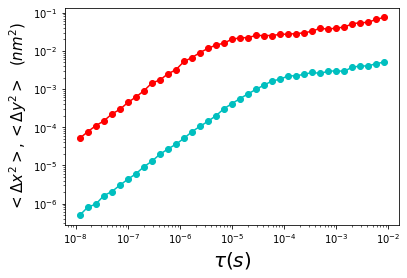

In [17]:
#plt.plot(mean_t_arr,msd_xarr*1e18,'bo-')
plt.plot(mean_t_arr,msd_yarr*1e18,'ro-')
plt.plot(mean_t_arr,msd_zarr*1e18,'co-')


plt.ylabel(r'$<\Delta x^2>,<\Delta y^2> \ \  (nm^2)$',size=15)
plt.xlabel(r'$\tau  (s)$',size=20)

'''plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,6))
plt.ticklabel_format(style='sci', axis='y', scilimits=(-8,6))'''

plt.xscale('log')
plt.yscale('log')
#plt.savefig('mvm_iso_x_y_long.png')

plt.show()